<a href="https://colab.research.google.com/github/ksublo/machine_learning/blob/master/Audi_used_car_listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audi used car listings - BLO0021 - KseniiaBlokhina

In [ ]:
import warnings
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# DATASET LOADING

In [ ]:
df = pd.read_csv('/content/sample_data/audi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


# About Dataset

**Data set contains information of price, transmission, mileage, fuel type, road tax, miles per gallon (mpg), and engine size**

**Data description:**

model: audi model

year registraion: year

price: price in Euros

transmission: type of gear box

mileage: distance used

fuelType: engine fuel

tax: road tax

mpg: miles per galoon

engineSize: size in litres




In [ ]:
df.shape

(10668, 9)

that dataset contains 10668 records of used cars with 9 attributes

In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
#Check for empty values
df.isnull().sum().sort_values(ascending=False)[:10]

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


there is no empty values

## NON Numeric Coloumns

In [ ]:
#Check for non-numeric columns
df.describe(exclude=np.number)

,model,transmission,fuelType
count,10668,10668,10668
unique,26,3,3
top,A3,Manual,Diesel
freq,1929,4369,5577


So i found that there is the 3 non-numeric columns: model, transmission and fuel type.

### Model

In [ ]:
#Analyze of non-numeric coloumns - model

model_count = df['model'].value_counts()
model_count

,count
model,
A3,1929
Q3,1417
A4,1381
A1,1347
A5,882
Q5,877
Q2,822
A6,748
Q7,397


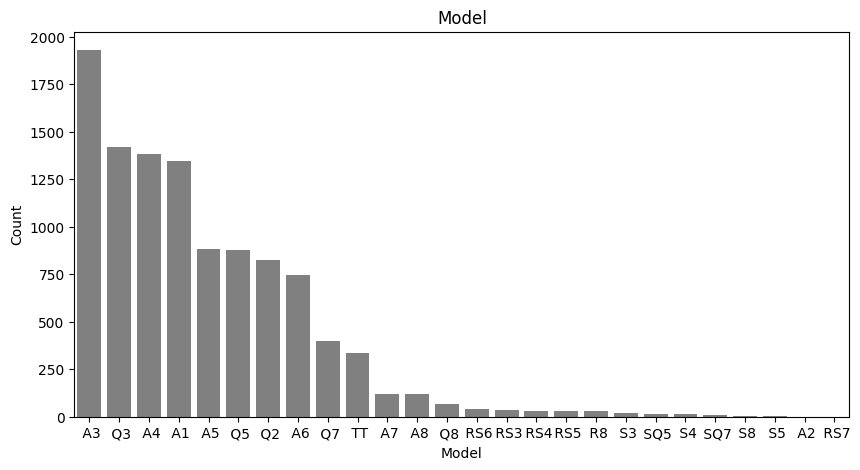

In [ ]:
# -- Which model is the most popular and what models is in dataset?

pltfigure = plt.figure(figsize=(10, 5))
sns.barplot(x=model_count.index, y=model_count.values, color='grey')
plt.title('Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [ ]:
df['model'].value_counts(normalize=True) * 100

,proportion
model,
A3,18.082115
Q3,13.282715
A4,12.945257
A1,12.626547
A5,8.267717
Q5,8.220847
Q2,7.705287
A6,7.011624
Q7,3.721410


### Transmission

In [ ]:
#Analyze of non-numeric coloumns - transmission
df['transmission'].value_counts()


,count
transmission,
Manual,4369
Semi-Auto,3591
Automatic,2708


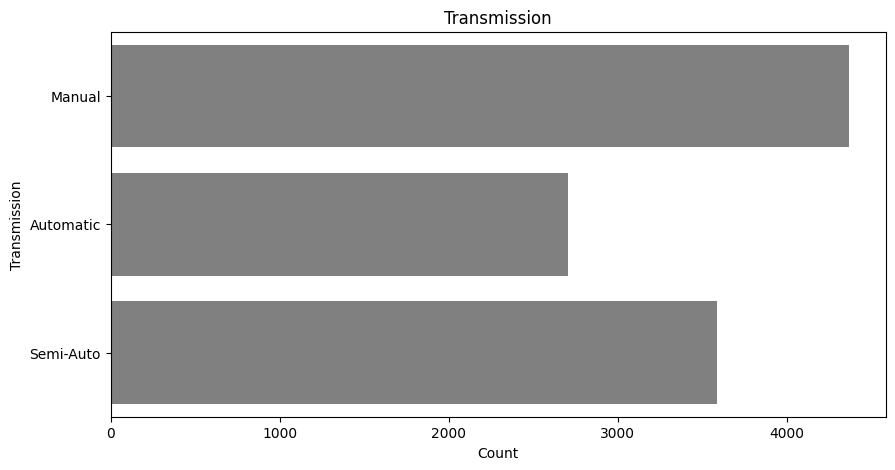

In [ ]:
# -- Which types of transmission there is?

pltfigure = plt.figure(figsize=(10, 5))
sns.countplot(df['transmission'], color='grey')
plt.title('Transmission')
plt.xlabel('Count')
plt.ylabel('Transmission')
plt.show()

In [ ]:
df['transmission'].value_counts(normalize=True) * 100

,proportion
transmission,
Manual,40.954256
Semi-Auto,33.661417
Automatic,25.384327


### FuelType

In [ ]:
#Analyze of non-numeric coloumns - fuelType
df['fuelType'].value_counts()

,count
fuelType,
Diesel,5577
Petrol,5063
Hybrid,28


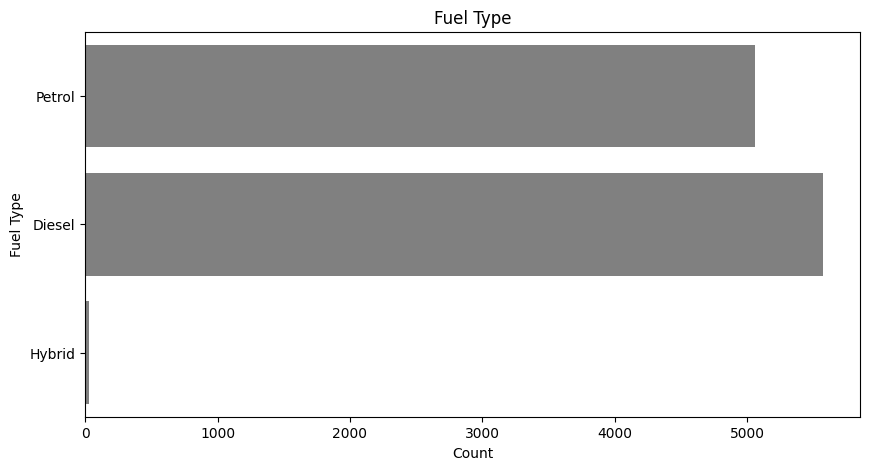

In [ ]:
# -- Which types of fuel there is?

pltfigure = plt.figure(figsize=(10, 5))
sns.countplot(df['fuelType'], color='grey')
plt.title('Fuel Type')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.show()

In [ ]:
df['fuelType'].value_counts(normalize=True) * 100

,proportion
fuelType,
Diesel,52.277840
Petrol,47.459693
Hybrid,0.262467


## Numerical Columns

In [ ]:
numeric_columns = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
df[numeric_columns].head()

,year,price,mileage,tax,mpg,engineSize
0,2017,12500,15735,150,55.4,1.4
1,2016,16500,36203,20,64.2,2.0
2,2016,11000,29946,30,55.4,1.4
3,2017,16800,25952,145,67.3,2.0
4,2019,17300,1998,145,49.6,1.0


### Year

In [ ]:
#Analyze of numeric coloumns - year
year_percentages = df['year'].value_counts(normalize=True).sort_index() * 100

horizontal_table = pd.DataFrame([year_percentages.values], columns=year_percentages.index)
horizontal_table

year,1997,1998,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.009374,0.009374,0.018748,0.056243,0.046869,0.065617,0.084364,0.149981,0.19685,0.215598,...,0.44057,0.796775,2.727784,4.190101,9.364454,18.410199,18.138358,8.098988,29.968129,6.711661


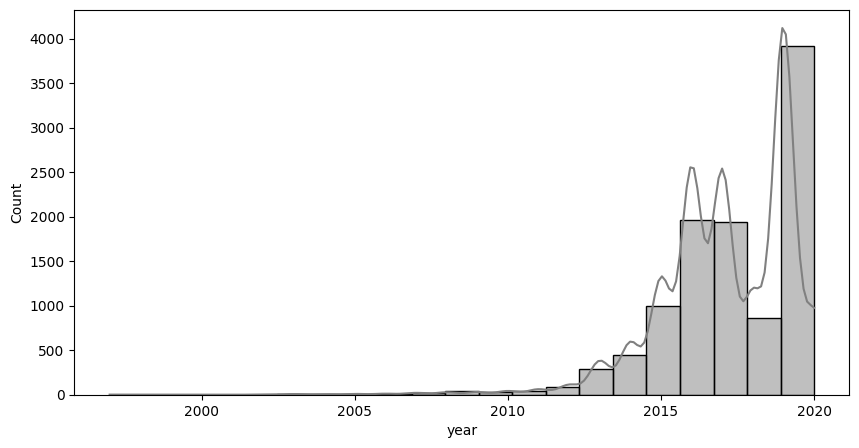

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x = df['year'], bins=21, kde=True, color="grey")
plt.show()

Count of cars increasing significantly after 2010 and peaking around 2018-2020. The density line indicates a sharp rise in car registrations in recent years, with very few older cars in the dataset.

### Price

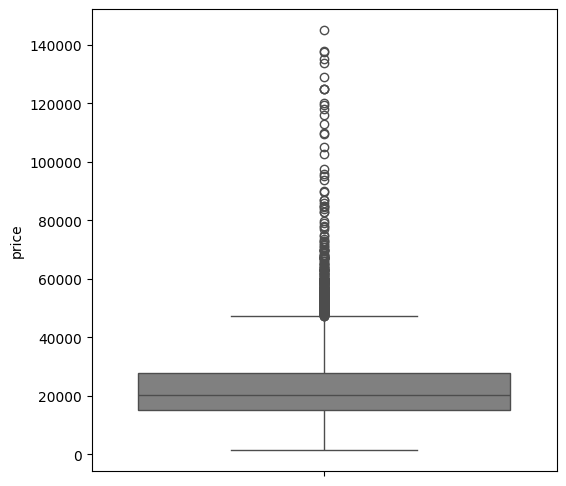

In [ ]:
#Analyze of numeric coloumns - price

plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y='price', color='grey')
plt.show()

 Most car prices range between €15k and €30k, with a median around €20k. Outliers above €40k represent high-end or luxury cars, with prices reaching up to €140k.

### Mileage

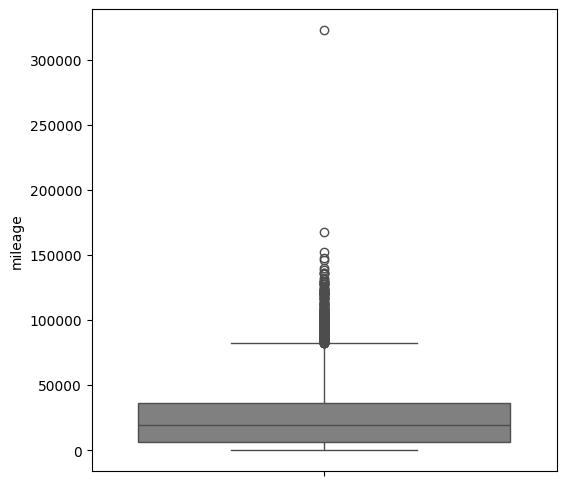

In [ ]:
#Analyze of numeric coloumns - mileage

plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y='mileage', color='grey')
plt.show()

 Most cars in the dataset are relatively moderately used, with mileage concentrated between 25,000 and 75,000. The outliers (cars with very high mileage) suggest older or heavily used cars.

### Tax

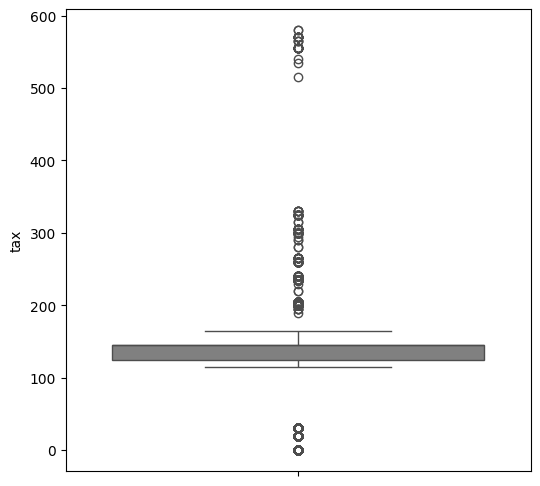

In [ ]:
#Analyze of numeric coloumns - tax

plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y='tax', color='grey')
plt.show()

The outliers with very high taxes likely represent high-performance or luxury cars, while the low or zero-tax outliers may correspond to eco-friendly or electric vehicles with tax exemptions.

### MPG

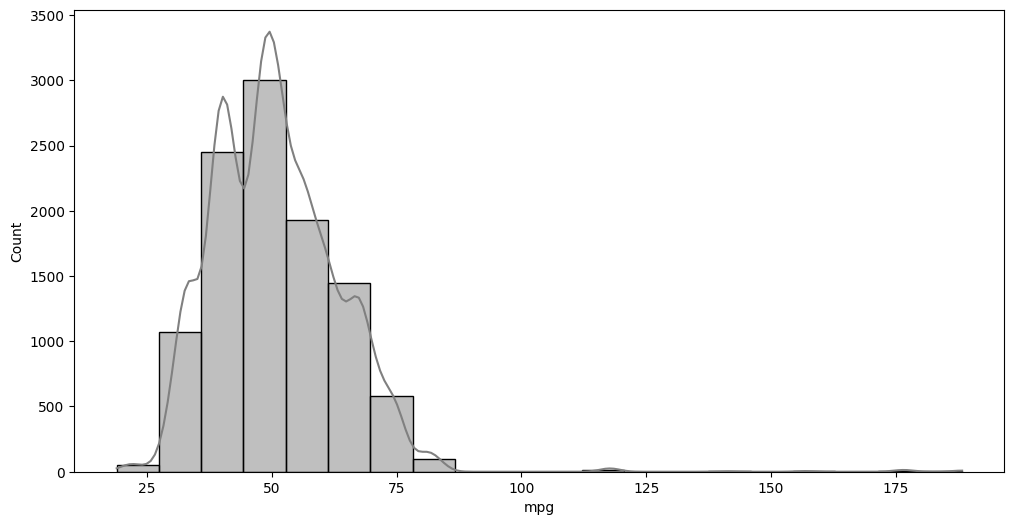

In [ ]:
#Analyze of numeric coloumns - mpg

plt.figure(figsize=(12, 6))
sns.histplot(df['mpg'], kde=True, bins=20, color='grey')
plt.show()

Most cars have MPG values concentrated between 40 and 60, indicating they are relatively fuel-efficient. Right side suggests a small number of outliers with extremely high MPG, likely hybrid or very fuel-efficient models, while the left end indicates fewer cars with very low MPG, typically representing larger or less efficient vehicles.

### Engine Size

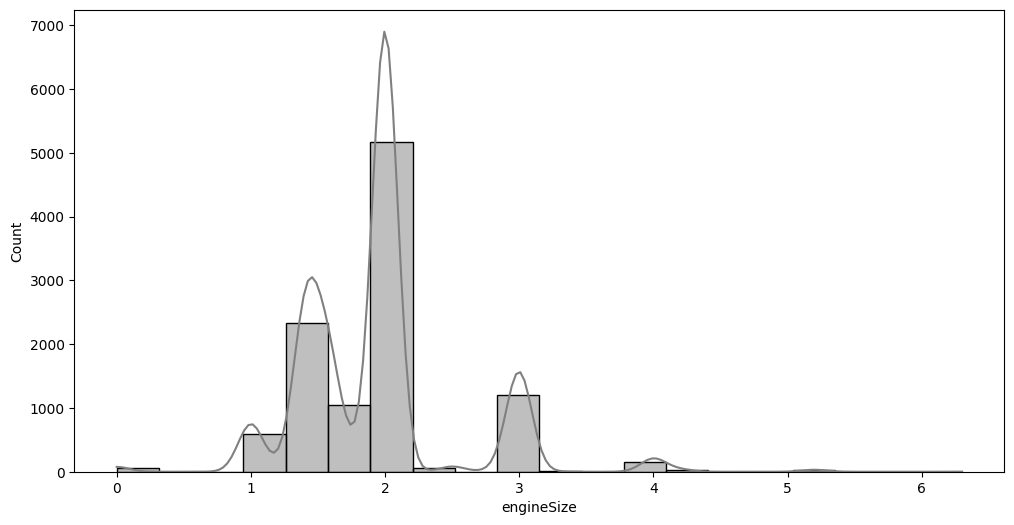

In [ ]:
#Analyze of numeric coloumns - engineSize

plt.figure(figsize=(12, 6))
sns.histplot(df['engineSize'], kde=True, bins=20, color='grey')
plt.show()


Majority of cars in the dataset have engine sizes concentrated around 2.0 liters, making it the most common engine size

## Hypotesis/answers

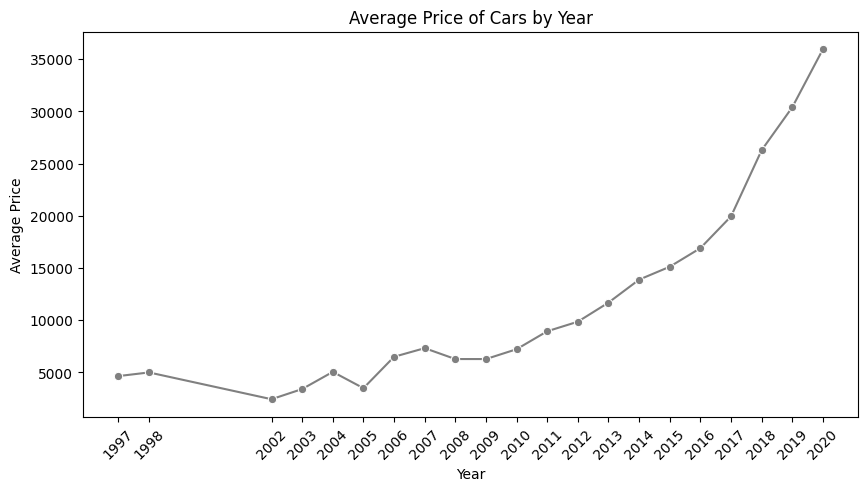

In [ ]:
# Hypothesis:
# The old cars are the cheapest, and the new ones are the most expensive

#Answear:
average_price_by_year = df.groupby('year')['price'].mean().reset_index()

average_price_by_year = average_price_by_year.sort_values('year')

plt.figure(figsize=(10, 5))
sns.lineplot(data=average_price_by_year, x='year', y='price', marker='o', color='grey')
plt.title('Average Price of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(ticks=average_price_by_year['year'], labels=average_price_by_year['year'], rotation=45)
plt.show()


I found that the cheapest car is from the year 2002, and it's not always the oldest car that is the cheapest, but the newest cars are indeed the most expensive.

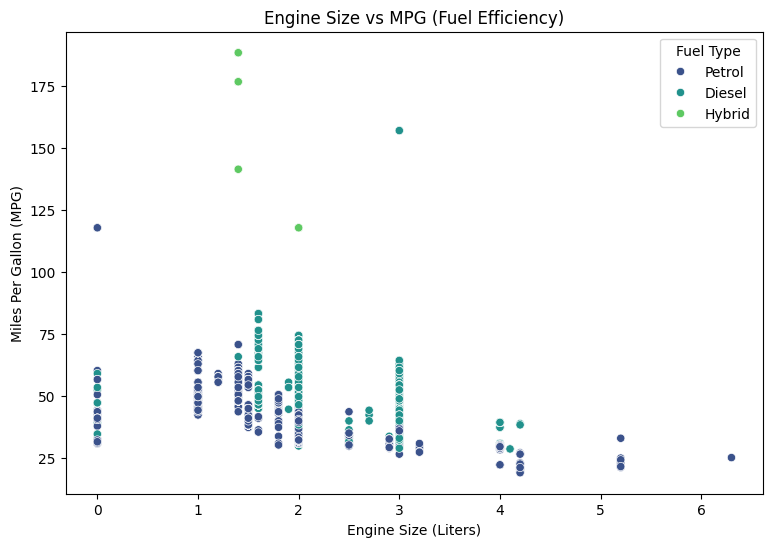

In [ ]:
# Hypothesis:
# Cars with smaller engine sizes are more fuel-efficient (higher MPG)

#Answear:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='engineSize', y='mpg', hue='fuelType', palette='viridis')
plt.title('Engine Size vs MPG (Fuel Efficiency)')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend(title='Fuel Type')
plt.show()


Smaller engine sizes are more fuel-efficient, as they deliver higher MPG, with hybrid cars being the most efficient overall. Larger engines, particularly petrol ones, have significantly lower MPG, confirming that engine size inversely impacts fuel efficiency.

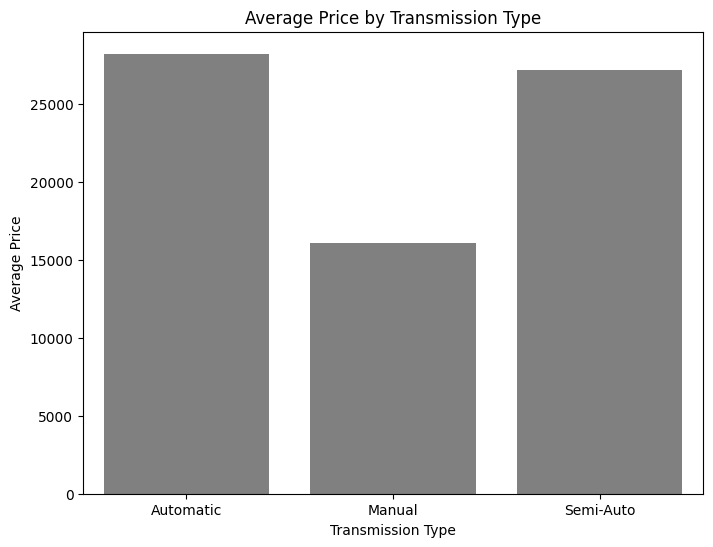

In [ ]:
# Hypothesis:
# Cars with automatic transmission are generally more expensive than cars with manual transmission

#Answear:
average_price_by_transmission = df.groupby('transmission')['price'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=average_price_by_transmission, x='transmission', y='price', color='grey')
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Price')
plt.show()


Automatic and semi-automatic cars have significantly higher average prices compared to manual cars, confirming that transmission type influences car pricing.

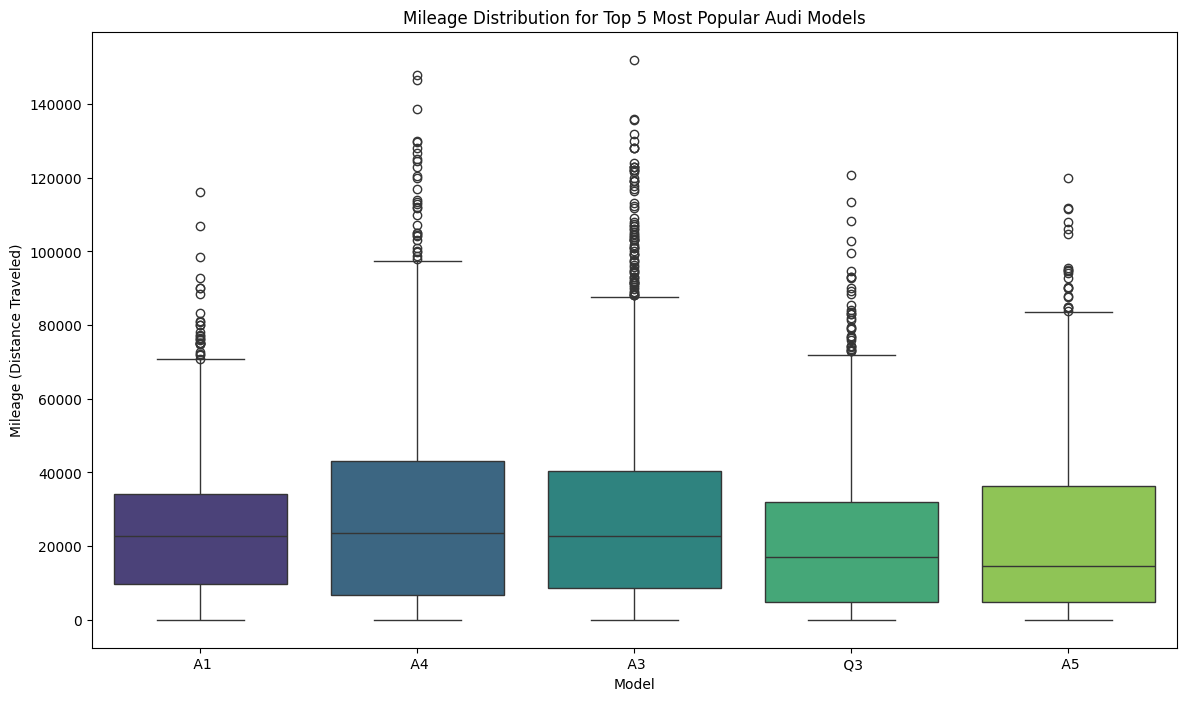

In [ ]:
# Hypothesis:
# The most popular model tends to have higher mileage compared to others.

#Answear:
top_models = df['model'].value_counts().head(5).index

top_models_data = df[df['model'].isin(top_models)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=top_models_data, x='model', y='mileage', hue='model', palette='viridis')
plt.title('Mileage Distribution for Top 5 Most Popular Audi Models')
plt.xlabel('Model')
plt.ylabel('Mileage (Distance Traveled)')
plt.show()

The results show that the most popular model (A1) does not have the highest mileage. This indicates that popularity does not directly correlate with mileage, as other factors such as car age, usage patterns, and target audience may play a role.

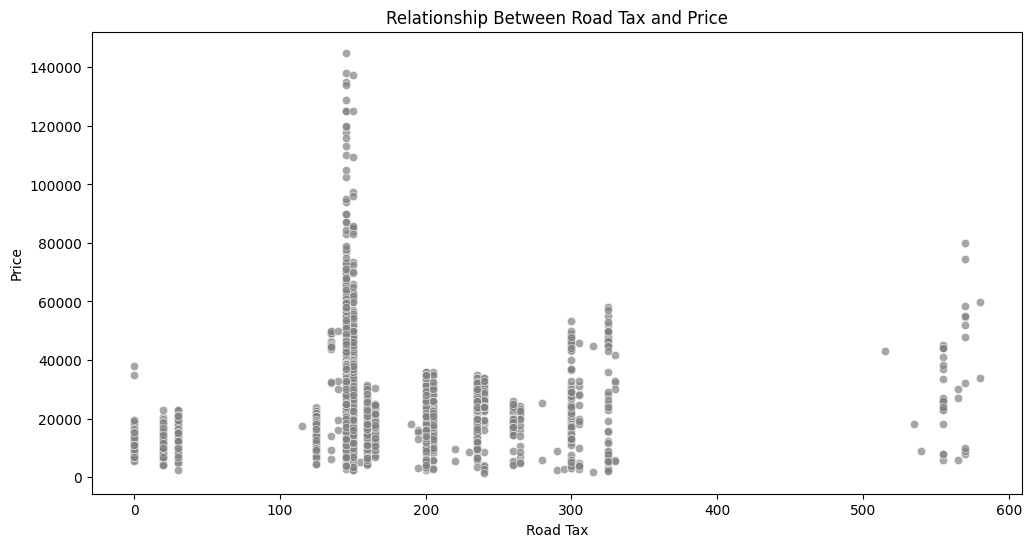

In [ ]:
# Hypothesis:
# Cars with higher road tax (tax) are more expensive.

#Answear:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='tax', y='price', alpha=0.7, color='grey')
plt.title('Relationship Between Road Tax and Price')
plt.xlabel('Road Tax')
plt.ylabel('Price')
plt.show()


The data partially supports the hypothesis, but there are exceptions in lower tax brackets where car prices vary significantly. Other factors like car type, model, and fuel efficiency likely influence pricing alongside road tax.

# Categorical columns encoding

There are some non-numeric columns in the dataset, so we need to encode them into numeric values to ensure they can be used in the correlation matrix and machine learning algorithms

In [ ]:
df_encoded = df

## Model

For the model column, I chose the Ordinal Encoder, which assigns a unique numeric value to each model, because there are 20+ models, and this method is an efficient choice that avoids creating a large number of additional columns as One-Hot Encoding would.

In [ ]:
ordinal_encoder = OrdinalEncoder()
df_encoded['model'] = ordinal_encoder.fit_transform(df[['model']])
df_encoded

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.0,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,5.0,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,0.0,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,3.0,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,2.0,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,2.0,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,2.0,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,2.0,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,9.0,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


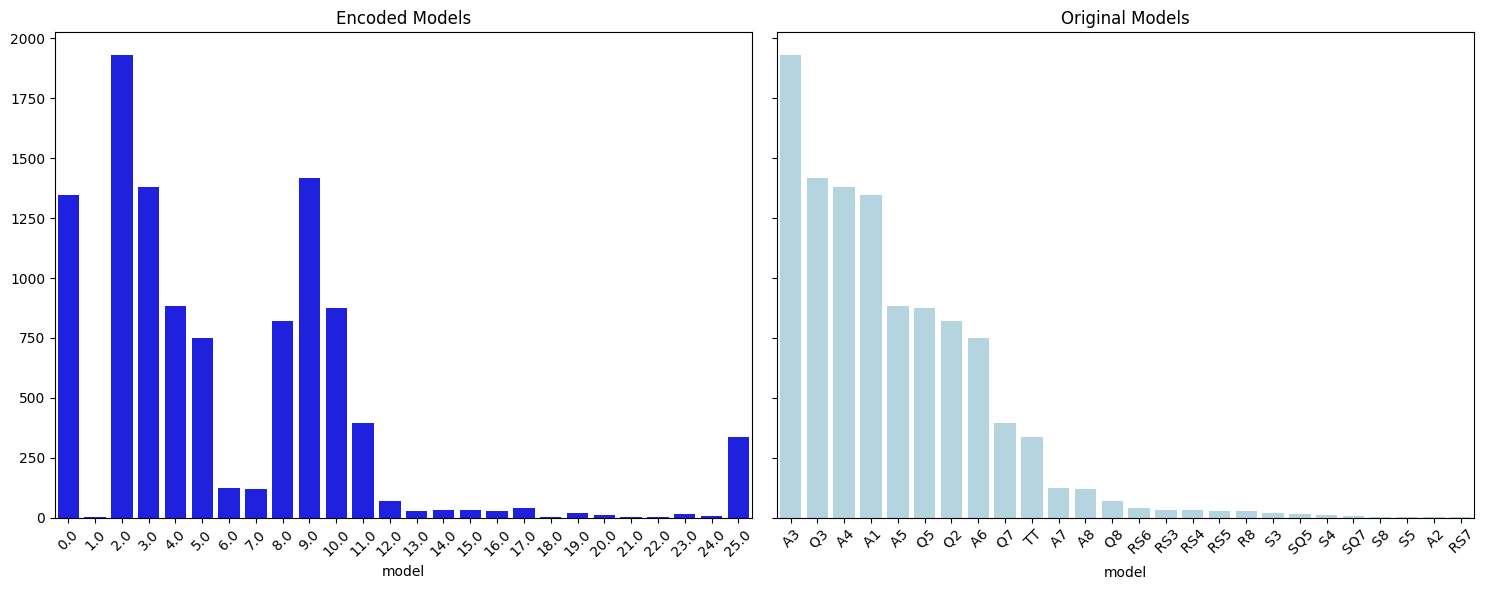

In [ ]:
model_count_original = df['model'].value_counts()
model_count_encoded = df_encoded['model'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

sns.barplot(ax=axes[0], x=model_count_encoded.index, y=model_count_encoded.values, color='blue')
axes[0].set_title('Encoded Models')
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(ax=axes[1], x=model_count_original.index, y=model_count_original.values, color='lightblue')
axes[1].set_title('Original Models')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Transmission and FuelType

For transmission and fuelType, which each have 3 unique categories, I chose to use the OneHotEncoder because it creates separate binary columns for each category, avoiding any assumption of order or hierarchy among the categories. This method ensures that the encoded values are equally represented and suitable for machine learning algorithms.

In [ ]:
OH_encoder = OneHotEncoder(sparse_output=False)
oh_cols = pd.DataFrame(OH_encoder.fit_transform(df_encoded[['transmission', 'fuelType']]))
oh_cols.columns = ['trans_0', 'trans_1', 'trans_2', 'fuel_0', 'fuel_1', 'fuel_2']

df_encoded = df_encoded.drop(['transmission', 'fuelType'], axis=1)
df_encoded = pd.concat([df_encoded, oh_cols], axis=1)
df_encoded

,model,year,price,mileage,tax,mpg,engineSize,trans_0,trans_1,trans_2,fuel_0,fuel_1,fuel_2
0,0.0,2017,12500,15735,150,55.4,1.4,0.0,1.0,0.0,0.0,0.0,1.0
1,5.0,2016,16500,36203,20,64.2,2.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,2016,11000,29946,30,55.4,1.4,0.0,1.0,0.0,0.0,0.0,1.0
3,3.0,2017,16800,25952,145,67.3,2.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2.0,2019,17300,1998,145,49.6,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,2.0,2020,16999,4018,145,49.6,1.0,0.0,1.0,0.0,0.0,0.0,1.0
10664,2.0,2020,16999,1978,150,49.6,1.0,0.0,1.0,0.0,0.0,0.0,1.0
10665,2.0,2020,17199,609,150,49.6,1.0,0.0,1.0,0.0,0.0,0.0,1.0
10666,9.0,2017,19499,8646,150,47.9,1.4,1.0,0.0,0.0,0.0,0.0,1.0


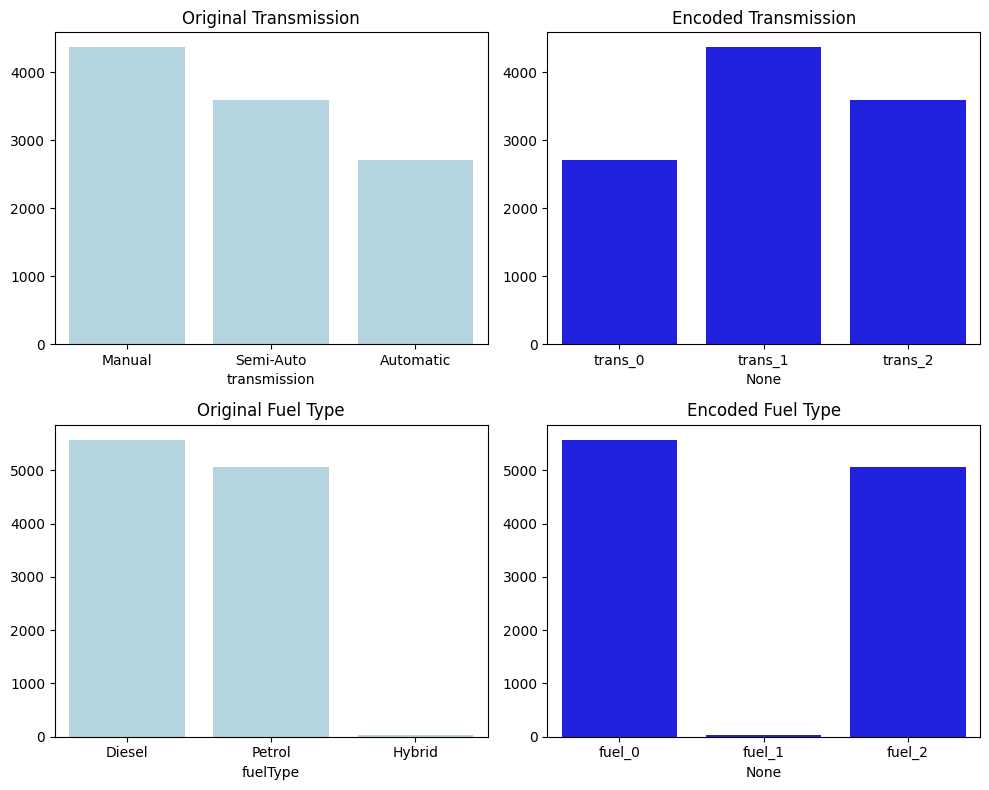

In [ ]:
transmission_counts_original = df['transmission'].value_counts()
fuelType_counts_original = df['fuelType'].value_counts()

transmission_counts_encoded = oh_cols[['trans_0', 'trans_1', 'trans_2']].sum()
fuelType_counts_encoded = oh_cols[['fuel_0', 'fuel_1', 'fuel_2']].sum()

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=False)

# transmission
sns.barplot(ax=axes[0, 0], x=transmission_counts_original.index, y=transmission_counts_original.values, color='lightblue')
axes[0, 0].set_title('Original Transmission')
sns.barplot(ax=axes[0, 1], x=transmission_counts_encoded.index, y=transmission_counts_encoded.values, color='blue')
axes[0, 1].set_title('Encoded Transmission')

# fuelType
sns.barplot(ax=axes[1, 0], x=fuelType_counts_original.index, y=fuelType_counts_original.values, color='lightblue')
axes[1, 0].set_title('Original Fuel Type')
sns.barplot(ax=axes[1, 1], x=fuelType_counts_encoded.index, y=fuelType_counts_encoded.values, color='blue')
axes[1, 1].set_title('Encoded Fuel Type')

plt.tight_layout()
plt.show()


# Correlation

In [ ]:
corr = df_encoded.corr()
corr

,model,year,price,mileage,tax,mpg,engineSize,trans_0,trans_1,trans_2,fuel_0,fuel_1,fuel_2
model,1.000000,0.056775,0.394635,-0.068694,0.393301,-0.408770,0.369126,0.115041,-0.191201,0.093019,0.049560,-0.000843,-0.049486
year,0.056775,1.000000,0.592581,-0.789667,0.093066,-0.351281,-0.031582,0.110245,-0.271576,0.181076,-0.122650,0.007761,0.121886
price,0.394635,0.592581,1.000000,-0.535357,0.356157,-0.600334,0.591262,0.264294,-0.483137,0.259356,0.030452,0.031946,-0.033733
mileage,-0.068694,-0.789667,-0.535357,1.000000,-0.166547,0.395103,0.070710,-0.086044,0.218079,-0.147694,0.240183,0.008863,-0.241152
tax,0.393301,0.093066,0.356157,-0.166547,1.000000,-0.635909,0.393075,0.203198,-0.358241,0.185654,-0.099025,-0.040733,0.103224
mpg,-0.408770,-0.351281,-0.600334,0.395103,-0.635909,1.000000,-0.365621,-0.205186,0.385169,-0.211845,0.280487,0.393983,-0.320926
engineSize,0.369126,-0.031582,0.591262,0.070710,0.393075,-0.365621,1.000000,0.247971,-0.407741,0.195931,0.370917,-0.018414,-0.369124
trans_0,0.115041,0.110245,0.264294,-0.086044,0.203198,-0.205186,0.247971,1.000000,-0.485761,-0.415481,0.107942,0.020596,-0.110079
trans_1,-0.191201,-0.271576,-0.483137,0.218079,-0.358241,0.385169,-0.407741,-0.485761,1.000000,-0.593251,-0.062978,-0.042723,0.067371
trans_2,0.093019,0.181076,0.259356,-0.147694,0.185654,-0.211845,0.195931,-0.415481,-0.593251,1.000000,-0.033875,0.025491,0.031272


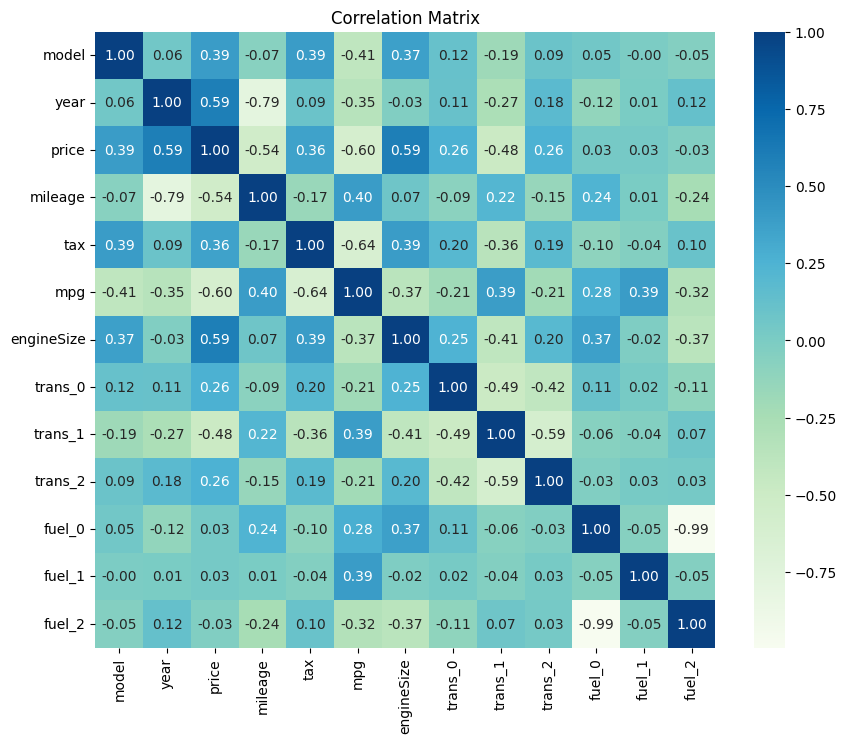

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='GnBu', xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('Correlation Matrix')
plt.show()

➕ Correlations like **price** and **year** (0.59), **mileage** and **price** (-0.53), or **engineSize** and **tax** (0.39) align with domain expectations.

➕ Variables with strong correlation to **price** (like **year**, **engineSize**, **tax**) may be useful.

➖ **fuel_0** and **fuel_2** show almost perfect negative correlation (-0.99), indicating redundancy due to the OneHotEncoding of mutually exclusive categories. This could create issues for us.

➖ Variables like **mileage** and **engineSize** (0.07) or **year** and **engineSize** (-0.03) show weak correlations, which might not add significant value to models depending on the task.

# Normalization

Normalization is essential to ensure that features with larger scales (like price) do not overshadow features with smaller scales (like engineSize or mpg).

In [ ]:
numeric_columns = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
scaler = MinMaxScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])
df_encoded.head()

,model,year,price,mileage,tax,mpg,engineSize,trans_0,trans_1,trans_2,fuel_0,fuel_1,fuel_2
0,0.0,0.869565,0.076719,0.048712,0.258621,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0
1,5.0,0.826087,0.104592,0.112081,0.034483,0.267414,0.317460,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.826087,0.066267,0.092709,0.051724,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0
3,3.0,0.869565,0.106682,0.080344,0.250000,0.285714,0.317460,1.0,0.0,0.0,1.0,0.0,0.0
4,2.0,0.956522,0.110167,0.006183,0.250000,0.181228,0.158730,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df_encoded['model'] = scaler.fit_transform(df_encoded[['model']])
df_encoded.head()

,model,year,price,mileage,tax,mpg,engineSize,trans_0,trans_1,trans_2,fuel_0,fuel_1,fuel_2
0,0.00,0.869565,0.076719,0.048712,0.258621,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0
1,0.20,0.826087,0.104592,0.112081,0.034483,0.267414,0.317460,1.0,0.0,0.0,1.0,0.0,0.0
2,0.00,0.826087,0.066267,0.092709,0.051724,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0
3,0.12,0.869565,0.106682,0.080344,0.250000,0.285714,0.317460,1.0,0.0,0.0,1.0,0.0,0.0
4,0.08,0.956522,0.110167,0.006183,0.250000,0.181228,0.158730,0.0,1.0,0.0,0.0,0.0,1.0


After normalization, all numerical features in the dataset are scaled between 0 and 1, ensuring consistency

# K-Means algorithm

In [ ]:
X = df_encoded.values

In [ ]:
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

df_clustering_scores

,sse,silhouette
k,,
2,7958.477896,0.415117
3,6627.391927,0.409423
4,3968.720494,0.550790
5,2195.058242,0.675272
6,923.052346,0.764812
7,865.621106,0.687428
8,850.090386,0.614671
9,789.196129,0.543250
10,738.721305,0.547765


## Plot the SSE and Silhouette score

<Axes: xlabel='k', ylabel='sse'>

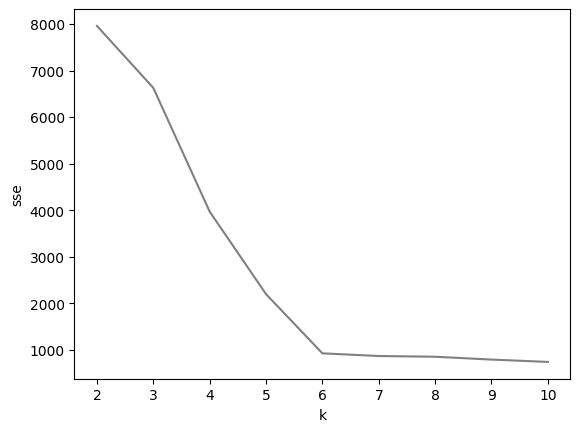

In [ ]:
sns.lineplot(data = df_clustering_scores, y='sse', x='k', color='grey')

<Axes: xlabel='k', ylabel='silhouette'>

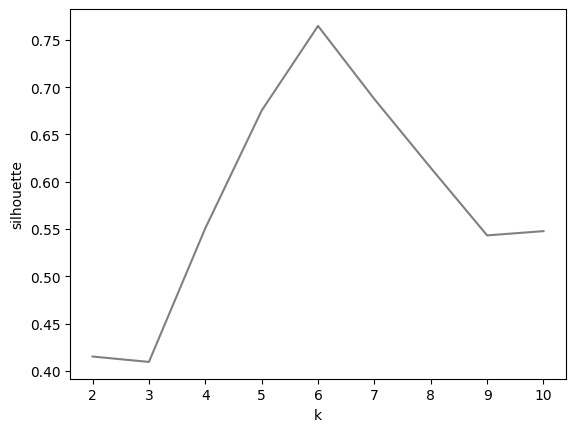

In [ ]:
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k', color='grey')

The optimal number of clusters is 6, as both the Elbow Method and the Silhouette Score indicate this as the most meaningful and efficient clustering solution.

## 6 clusters

In [ ]:
clustering = sklearn.cluster.KMeans(n_clusters=6, random_state=13)
clustering.fit(X)

KMeans(n_clusters=6, random_state=13)

In [ ]:
pd.Series(clustering.labels_).value_counts()

,count
2,2250
0,2119
3,1808
1,1783
4,1678
5,1030


In [ ]:
df_clustering = df_encoded.copy()

In [ ]:
df_clustering['cluster_id'] = clustering.labels_
df_clustering.head()

,model,year,price,mileage,tax,mpg,engineSize,trans_0,trans_1,trans_2,fuel_0,fuel_1,fuel_2,cluster_id
0,0.00,0.869565,0.076719,0.048712,0.258621,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0,2
1,0.20,0.826087,0.104592,0.112081,0.034483,0.267414,0.317460,1.0,0.0,0.0,1.0,0.0,0.0,4
2,0.00,0.826087,0.066267,0.092709,0.051724,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0,2
3,0.12,0.869565,0.106682,0.080344,0.250000,0.285714,0.317460,1.0,0.0,0.0,1.0,0.0,0.0,4
4,0.08,0.956522,0.110167,0.006183,0.250000,0.181228,0.158730,0.0,1.0,0.0,0.0,0.0,1.0,2


<Axes: xlabel='cluster_id', ylabel='count'>

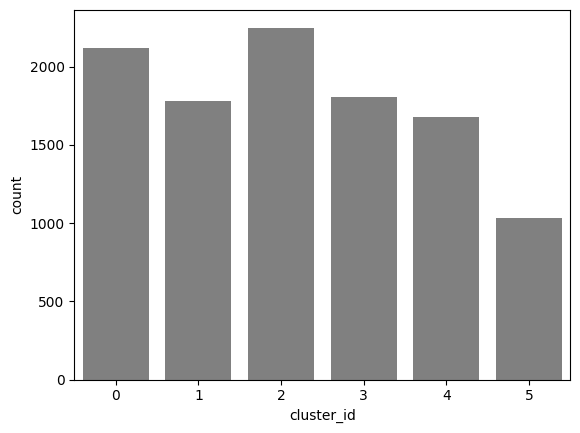

In [ ]:
sns.countplot(data=df_clustering, x='cluster_id', color='grey')

## Results

In [ ]:
df_clustering.columns

Index(['model', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'trans_0', 'trans_1', 'trans_2', 'fuel_0', 'fuel_1', 'fuel_2',
       'cluster_id'],
      dtype='object')

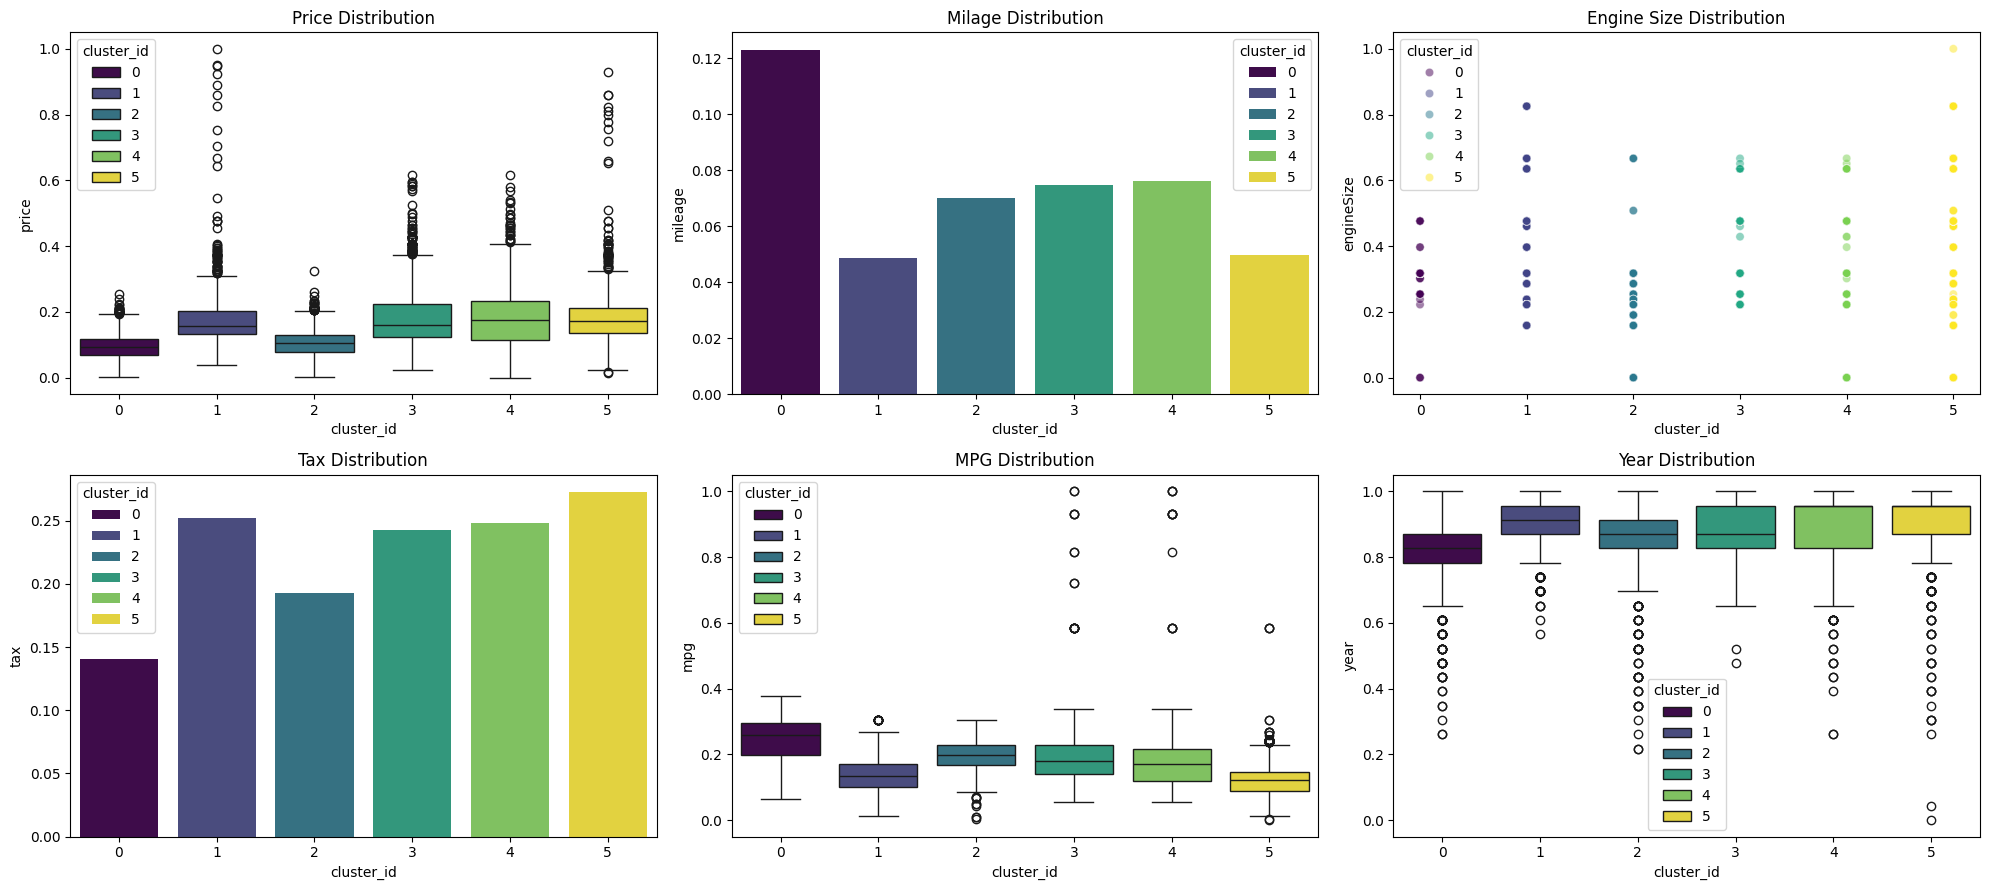

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 9))

sns.boxplot(data=df_clustering, x='cluster_id', y='price', ax=axes[0, 0] , hue='cluster_id', palette='viridis')
axes[0, 0].set_title('Price Distribution')

sns.barplot(data=df_clustering, x='cluster_id', y='mileage',ax=axes[0, 1], estimator=np.mean, errorbar=None, hue='cluster_id', palette='viridis')
axes[0, 1].set_title('Milage Distribution')

sns.scatterplot(data=df_clustering, x='cluster_id', y='engineSize', ax=axes[0, 2], hue='cluster_id', palette='viridis', alpha=0.5)
axes[0, 2].set_title('Engine Size Distribution')

sns.barplot(data=df_clustering, x='cluster_id', y='tax',ax=axes[1, 0], estimator=np.mean, errorbar=None, hue='cluster_id', palette='viridis')
axes[1, 0].set_title('Tax Distribution')

sns.boxplot(data=df_clustering, x='cluster_id', y='mpg', ax=axes[1, 1], hue='cluster_id', palette='viridis')
axes[1, 1].set_title('MPG Distribution')

sns.boxplot(data=df_clustering, x='cluster_id', y='year', ax=axes[1, 2], hue='cluster_id', palette='viridis')
axes[1, 2].set_title('Year Distribution')

plt.tight_layout()
plt.show()


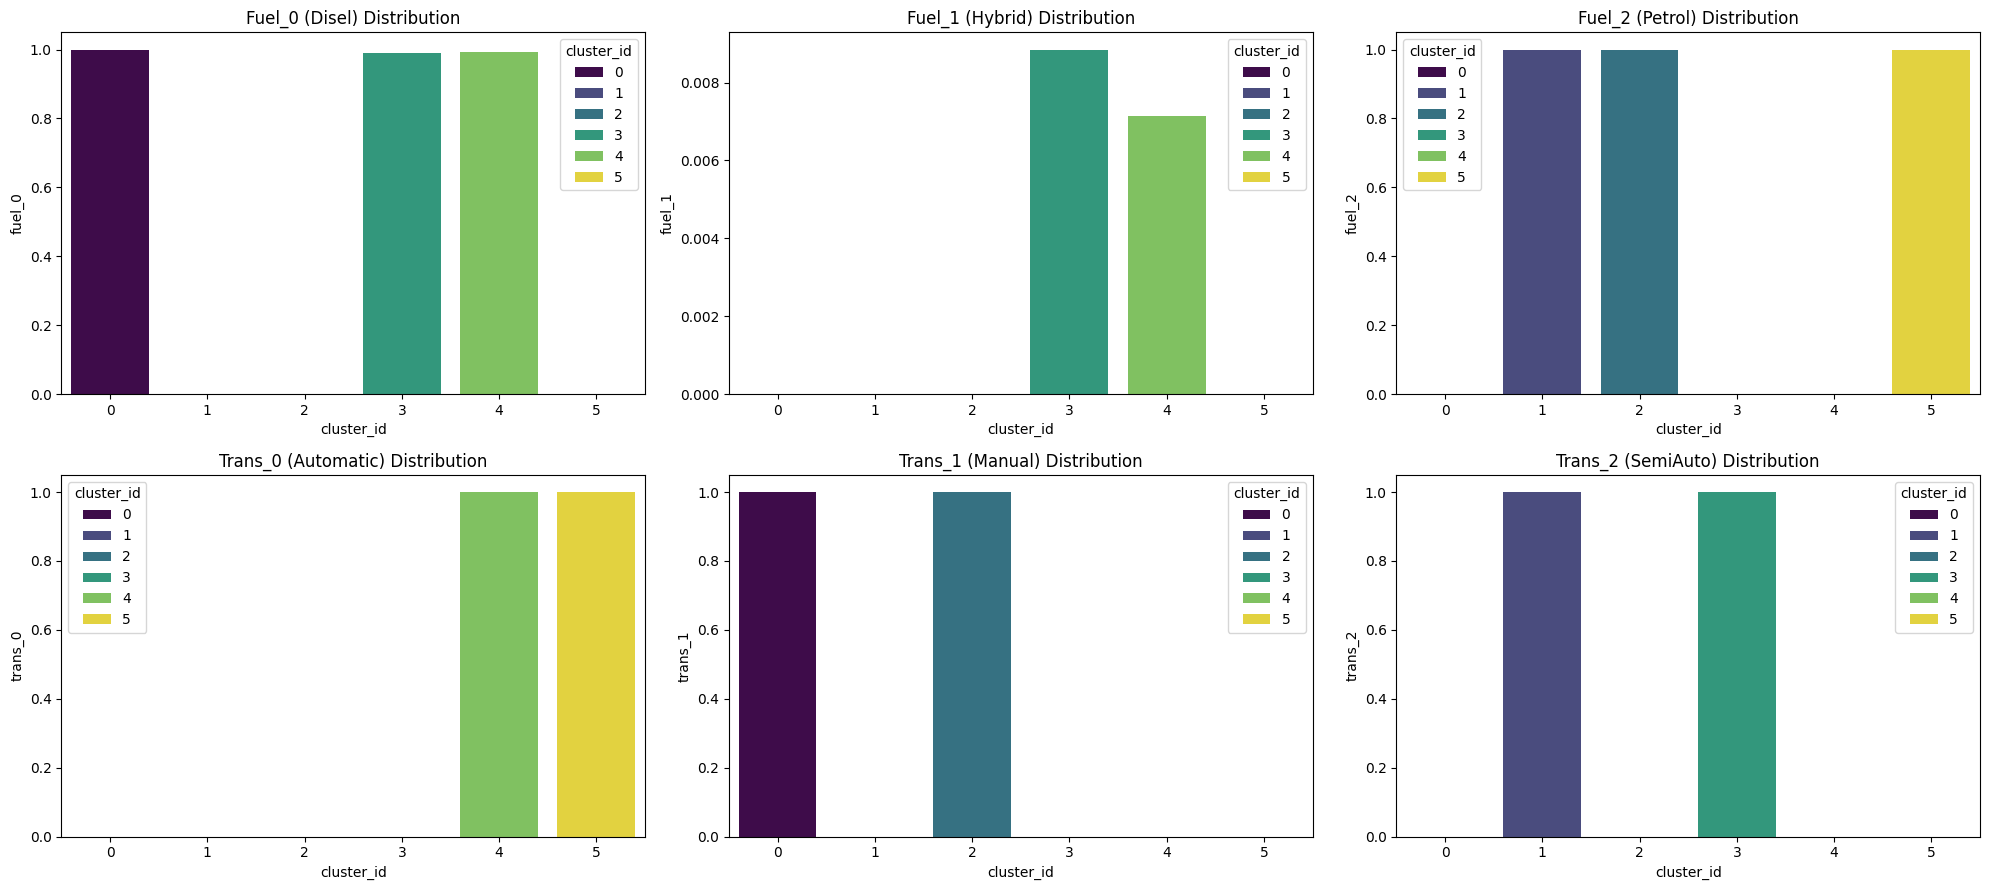

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 9))

sns.barplot(data=df_clustering, x='cluster_id', y='fuel_0',ax=axes[0, 0], estimator=np.mean, errorbar=None, hue='cluster_id', palette='viridis')
axes[0, 0].set_title('Fuel_0 (Disel) Distribution')

sns.barplot(data=df_clustering, x='cluster_id', y='fuel_1',ax=axes[0, 1], estimator=np.mean, errorbar=None, hue='cluster_id', palette='viridis')
axes[0, 1].set_title('Fuel_1 (Hybrid) Distribution')

sns.barplot(data=df_clustering, x='cluster_id', y='fuel_2',ax=axes[0, 2], estimator=np.mean, errorbar=None, hue='cluster_id', palette='viridis')
axes[0, 2].set_title('Fuel_2 (Petrol) Distribution')

sns.barplot(data=df_clustering, x='cluster_id', y='trans_0',ax=axes[1, 0], estimator=np.mean, errorbar=None, hue='cluster_id', palette='viridis')
axes[1, 0].set_title('Trans_0 (Automatic) Distribution')

sns.barplot(data=df_clustering, x='cluster_id', y='trans_1',ax=axes[1, 1], estimator=np.mean, errorbar=None, hue='cluster_id', palette='viridis')
axes[1, 1].set_title('Trans_1 (Manual) Distribution')

sns.barplot(data=df_clustering, x='cluster_id', y='trans_2',ax=axes[1, 2], estimator=np.mean, errorbar=None, hue='cluster_id', palette='viridis')
axes[1, 2].set_title('Trans_2 (SemiAuto) Distribution')

plt.tight_layout()
plt.show()

0️⃣ - contains the oldest, most heavily used cars with low costs, small engines, and low taxes - Diesel, Manual

1️⃣ - contains newer, higher-priced vehicles with large engines and low mileage - Petrol, Semi-Auto

2️⃣ - represents lower mid-priced, average old vehicles with balanced mileage, tax and engine size - Petrol, Manual

3️⃣- includes newer, moderately priced cars with larger engines and average mileage - Disel/Hybrid, SemiAuto

4️⃣- includes newer, moderately priced cars with larger engines and average mileage - Disel/Hybrid, Automatic

5️⃣ - represents the most premium, high-cost, low-mileage vehicles with large engines, tax and low mpg - Petrol, Automatic

# Hierarchical clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    plt.title('Hierarchical Clustering Dendrogram')
    dendrogram(linkage_matrix, **kwargs)
    plt.ylabel('distance')

In [ ]:
data = df_encoded
data.head()

,model,year,price,mileage,tax,mpg,engineSize,trans_0,trans_1,trans_2,fuel_0,fuel_1,fuel_2
0,0.00,0.869565,0.076719,0.048712,0.258621,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0
1,0.20,0.826087,0.104592,0.112081,0.034483,0.267414,0.317460,1.0,0.0,0.0,1.0,0.0,0.0
2,0.00,0.826087,0.066267,0.092709,0.051724,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0
3,0.12,0.869565,0.106682,0.080344,0.250000,0.285714,0.317460,1.0,0.0,0.0,1.0,0.0,0.0
4,0.08,0.956522,0.110167,0.006183,0.250000,0.181228,0.158730,0.0,1.0,0.0,0.0,0.0,1.0


### Complete

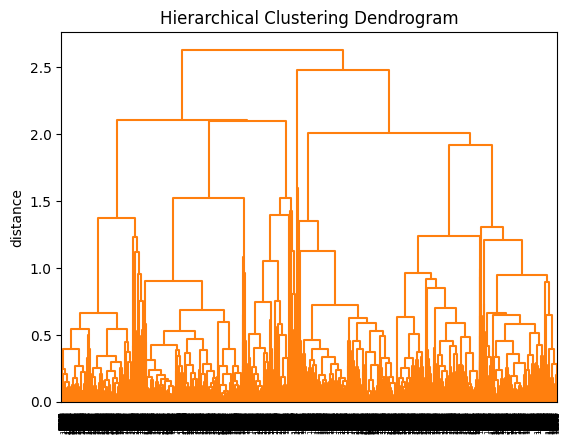

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None, compute_distances=True)
clustering = clustering.fit(data)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

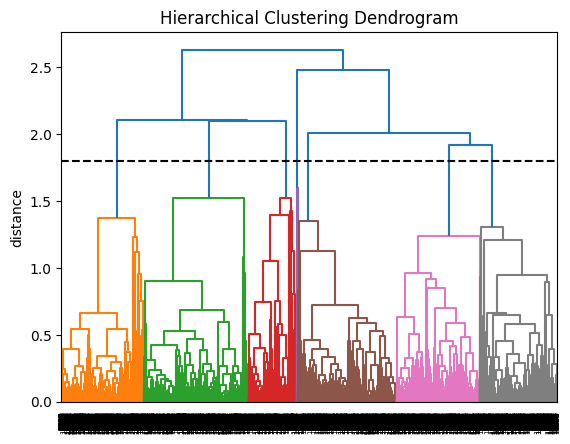

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=1.8)
plt.axhline(y=1.8, color='black', linestyle='--')

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=1.8, n_clusters=None)
clustering = clustering.fit(data)

pd.Series(clustering.labels_).value_counts()

,count
0,3458
4,2250
5,2119
3,1783
1,1030
2,28



The size of cluster 2 is significantly smaller (only 28 points) compared to the other clusters, which suggests it may represent outliers or noise rather than a meaningful group.

### Single

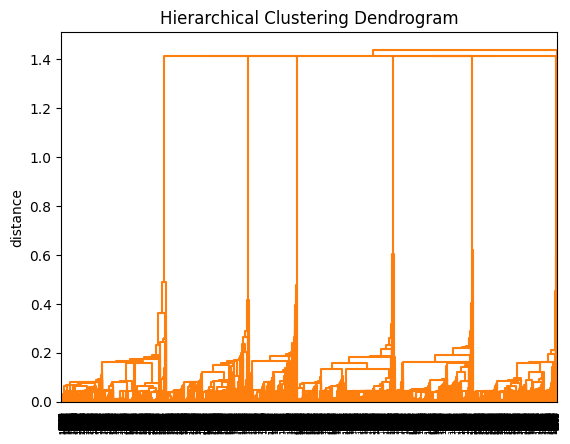

In [ ]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

In [ ]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=None, n_clusters=6)
clustering = clustering.fit(data)

pd.Series(clustering.labels_).value_counts()

,count
0,5063
2,2119
4,1792
1,1666
5,16
3,12


If I use the single linkage method instead of complete, there is a significant imbalance in cluster sizes, with some clusters containing very few data points (e.g., 16 and 12). This suggests that single linkage is prone to chaining effects, creating elongated clusters and failing to represent the data distribution properly.

### Average

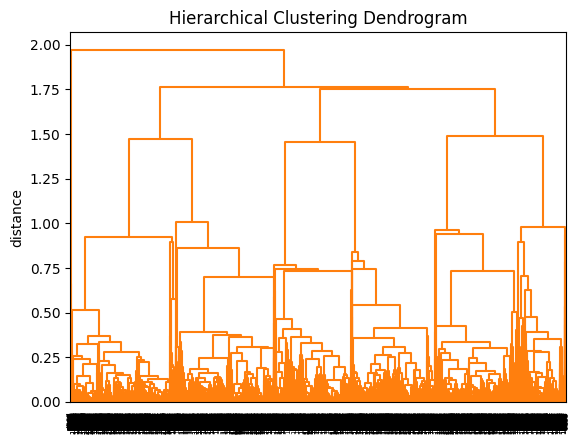

In [ ]:
clustering = AgglomerativeClustering(linkage='average', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

In [ ]:
clustering = AgglomerativeClustering(linkage='average', distance_threshold=None, n_clusters=7)
clustering = clustering.fit(data)

pd.Series(clustering.labels_).value_counts()

,count
0,3458
6,2250
1,2119
5,1783
2,1030
4,16
3,12


In the case of the average linkage method, while the clusters are more balanced than with single linkage, there are still two very small clusters (e.g., clusters with sizes 16 and 12).

### Ward

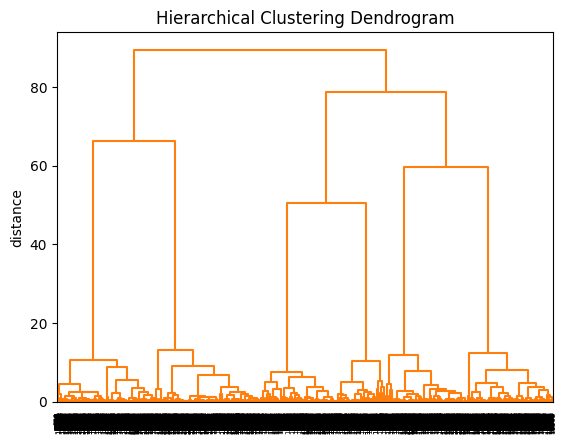

In [ ]:
clustering = AgglomerativeClustering(linkage='ward', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

In [ ]:
clustering = AgglomerativeClustering(linkage='ward', distance_threshold=30, n_clusters=None)
clustering = clustering.fit(data)

pd.Series(clustering.labels_).value_counts()

,count
0,2250
3,2119
2,1820
1,1783
5,1666
4,1030


The results now look much more balanced, especially compared to the results from the single and average linkage methods.

If we compare the results of K-Means and Hierarchial clustering there will be the same count of values in most of the clusters.

K-Means -> Hierarchial

*   Cluster2(2250) -> Cluster0(2250)
*   Cluster0(2119) -> Cluster3(2119)
*   Cluster3(1808) -> Cluster2(1820) : not same
*   Cluster1(1783) -> Cluster1(1783)
*   Cluster4(1678) -> Cluster5(1666) : not same
*   Cluster5(1030) -> Cluster4(1030)


### Results

In [ ]:
df_clustering1 = df_encoded.copy()

In [ ]:
df_clustering1['cluster_id'] = clustering.labels_
df_clustering1.head()

,model,year,price,mileage,tax,mpg,engineSize,trans_0,trans_1,trans_2,fuel_0,fuel_1,fuel_2,cluster_id
0,0.00,0.869565,0.076719,0.048712,0.258621,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.20,0.826087,0.104592,0.112081,0.034483,0.267414,0.317460,1.0,0.0,0.0,1.0,0.0,0.0,5
2,0.00,0.826087,0.066267,0.092709,0.051724,0.215466,0.222222,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.12,0.869565,0.106682,0.080344,0.250000,0.285714,0.317460,1.0,0.0,0.0,1.0,0.0,0.0,5
4,0.08,0.956522,0.110167,0.006183,0.250000,0.181228,0.158730,0.0,1.0,0.0,0.0,0.0,1.0,0


<Axes: xlabel='cluster_id', ylabel='count'>

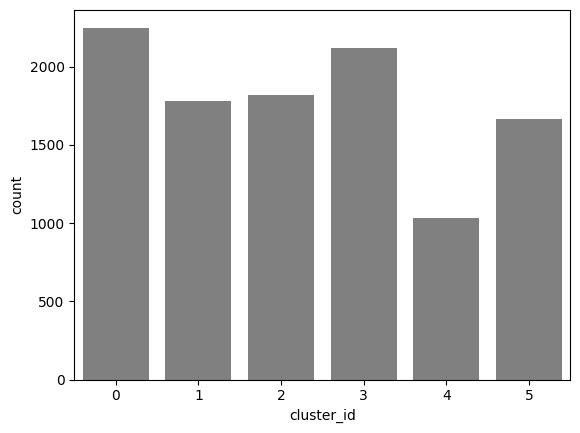

In [ ]:
sns.countplot(data=df_clustering1, x='cluster_id', color='grey')

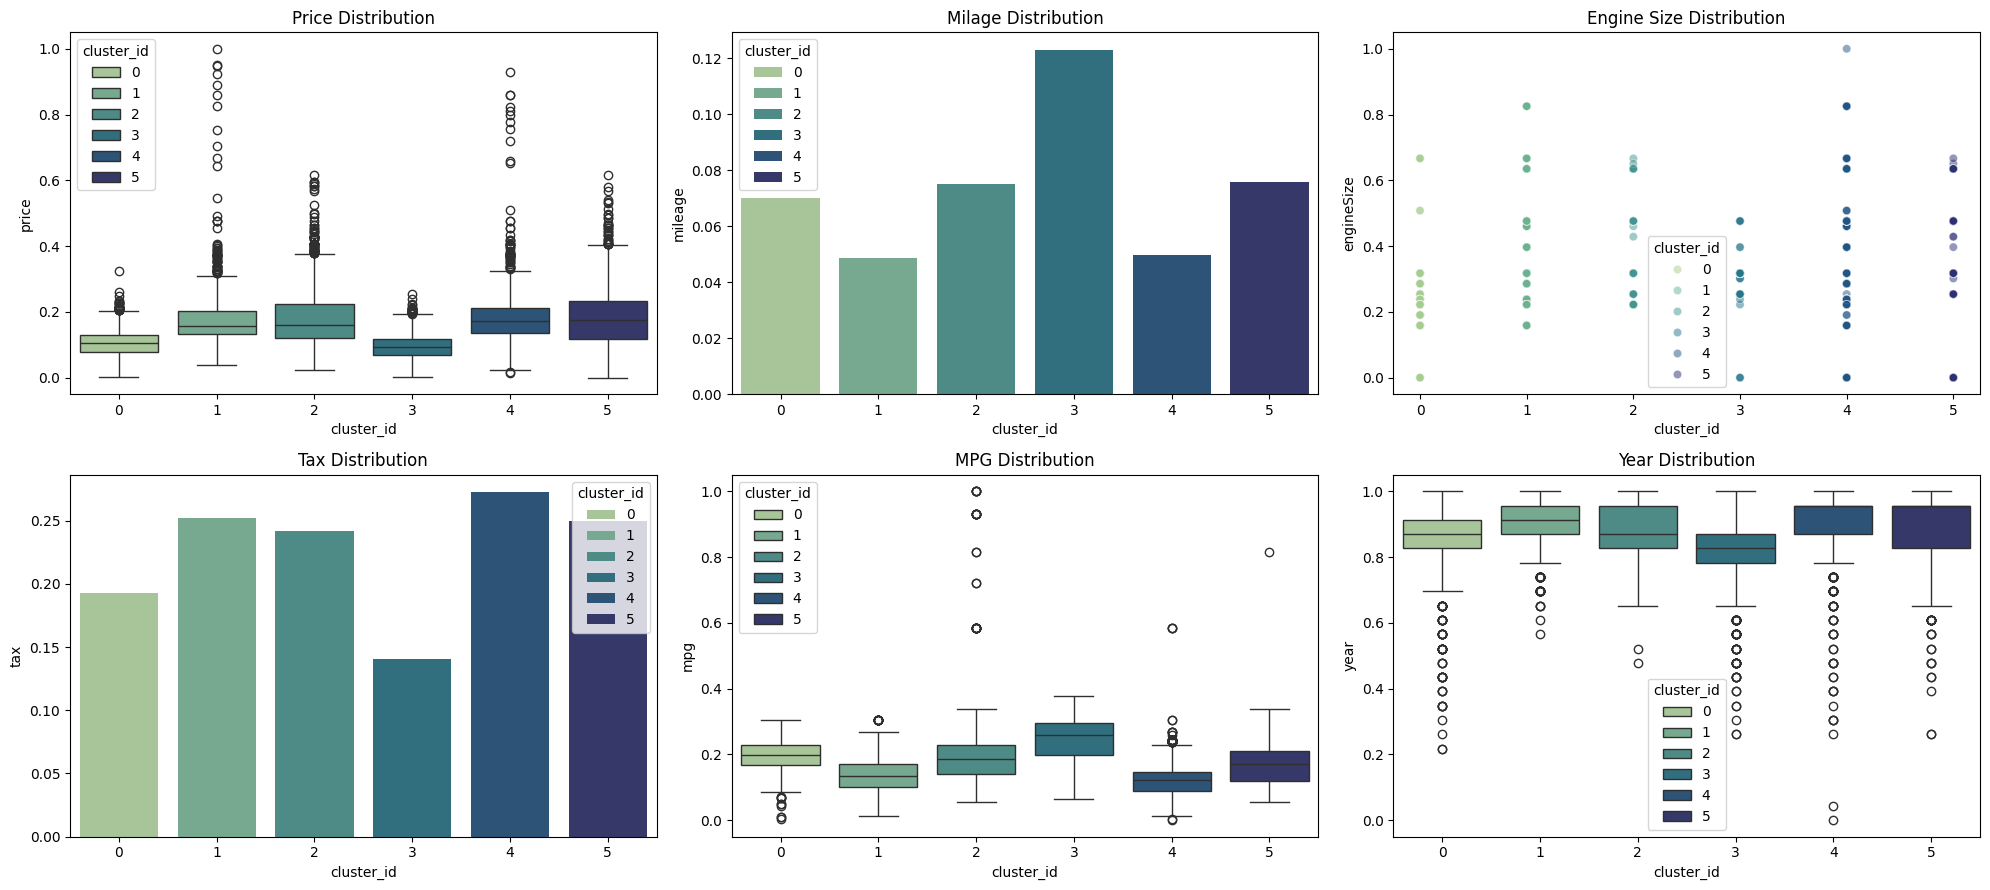

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 9))

sns.boxplot(data=df_clustering1, x='cluster_id', y='price', ax=axes[0, 0] , hue='cluster_id', palette='crest')
axes[0, 0].set_title('Price Distribution')

sns.barplot(data=df_clustering1, x='cluster_id', y='mileage',ax=axes[0, 1], estimator=np.mean, errorbar=None, hue='cluster_id', palette='crest')
axes[0, 1].set_title('Milage Distribution')

sns.scatterplot(data=df_clustering1, x='cluster_id', y='engineSize', ax=axes[0, 2], hue='cluster_id', palette='crest', alpha=0.5)
axes[0, 2].set_title('Engine Size Distribution')

sns.barplot(data=df_clustering1, x='cluster_id', y='tax',ax=axes[1, 0], estimator=np.mean, errorbar=None, hue='cluster_id', palette='crest')
axes[1, 0].set_title('Tax Distribution')

sns.boxplot(data=df_clustering1, x='cluster_id', y='mpg', ax=axes[1, 1], hue='cluster_id', palette='crest')
axes[1, 1].set_title('MPG Distribution')

sns.boxplot(data=df_clustering1, x='cluster_id', y='year', ax=axes[1, 2], hue='cluster_id', palette='crest')
axes[1, 2].set_title('Year Distribution')

plt.tight_layout()
plt.show()

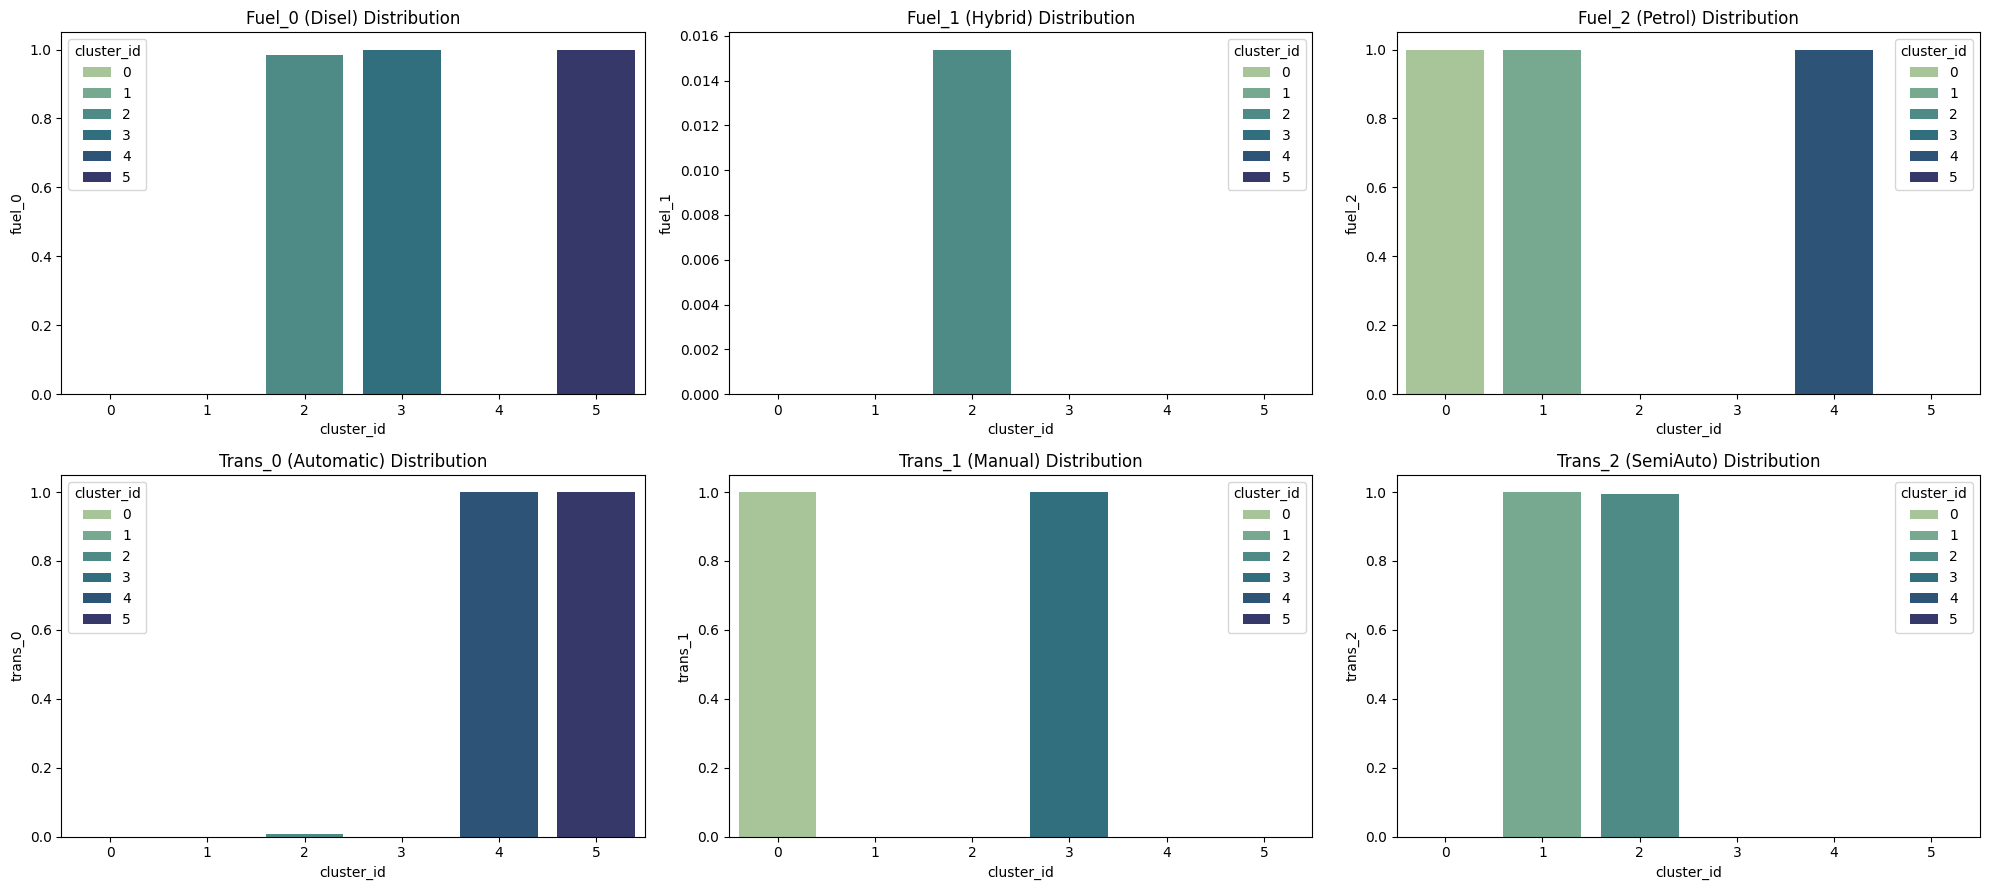

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 9))

sns.barplot(data=df_clustering1, x='cluster_id', y='fuel_0',ax=axes[0, 0], estimator=np.mean, errorbar=None, hue='cluster_id', palette='crest')
axes[0, 0].set_title('Fuel_0 (Disel) Distribution')

sns.barplot(data=df_clustering1, x='cluster_id', y='fuel_1',ax=axes[0, 1], estimator=np.mean, errorbar=None, hue='cluster_id', palette='crest')
axes[0, 1].set_title('Fuel_1 (Hybrid) Distribution')

sns.barplot(data=df_clustering1, x='cluster_id', y='fuel_2',ax=axes[0, 2], estimator=np.mean, errorbar=None, hue='cluster_id', palette='crest')
axes[0, 2].set_title('Fuel_2 (Petrol) Distribution')

sns.barplot(data=df_clustering1, x='cluster_id', y='trans_0',ax=axes[1, 0], estimator=np.mean, errorbar=None, hue='cluster_id', palette='crest')
axes[1, 0].set_title('Trans_0 (Automatic) Distribution')

sns.barplot(data=df_clustering1, x='cluster_id', y='trans_1',ax=axes[1, 1], estimator=np.mean, errorbar=None, hue='cluster_id', palette='crest')
axes[1, 1].set_title('Trans_1 (Manual) Distribution')

sns.barplot(data=df_clustering1, x='cluster_id', y='trans_2',ax=axes[1, 2], estimator=np.mean, errorbar=None, hue='cluster_id', palette='crest')
axes[1, 2].set_title('Trans_2 (SemiAuto) Distribution')

plt.tight_layout()
plt.show()

3️⃣ - contains the oldest, most heavily used cars with low costs, small engines, and low taxes - Diesel, Manual (same to K-Means)

1️⃣ - contains newer, higher-priced vehicles with large engines and low mileage - Petrol, Semi-Auto (same to K-Means)

0️⃣ - represents lower mid-priced, average old vehicles with balanced mileage, tax and engine size - Petrol, Manual (same to K-Means)

2️⃣ - includes newer, moderately priced cars with larger engines and average mileage - Disel/Hybrid, SemiAuto (contains Automatic : not same to K-Means)

5️⃣ - includes newer, moderately priced cars with larger engines and average mileage - Disel , Automatic (not contains Hybrid : not same to K-Means)

4️⃣ - represents the most premium, high-cost, low-mileage vehicles with large engines, tax and low mpg - Petrol, Automatic (same to K-Means)

The main difference between K-Means and Hierarchical clustering is that K-Means divides hybrid transmission cars into two different clusters, whereas Hierarchical clustering groups all hybrid cars into one cluster. This influenced the results, especially the number values in clusters, as two clusters were affected by this distinction.